# An analysis of Movie Data
---
## Questions to answer:

- Is there a correlation between certain words and highly rated movies?
- Are there genres that simply produce higher rated movies? 
- Which genres run the longest? 
- What keywords or plot points produce the worst kinds of movies?
- I'm a brand director on the scene - what advice do you have for me to produce - the Best movie?

In [2]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('ratings_small.csv')

In [ ]:
df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
df['rating'].dtype

dtype('float64')

In [ ]:
print('Number of unique movies:', len(df['movieId'].value_counts()), '\n')
smc = df['movieId'].value_counts().sort_index()
smc

Number of unique movies: 9066 



1         247
2         107
3          59
4          13
5          56
         ... 
161944      1
162376      1
162542      1
162672      1
163949      1
Name: movieId, Length: 9066, dtype: int64

In [ ]:
smc[31]

42

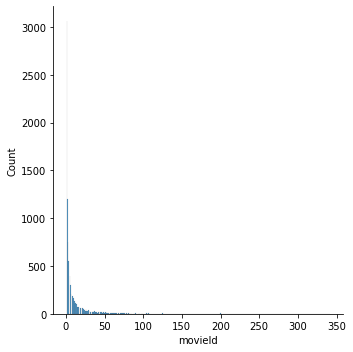

In [ ]:
import seaborn as sns
sns.displot(smc)

In [ ]:
df2 = pd.read_csv('ratings.csv')

In [ ]:
df2.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [ ]:
print(df2.shape)

(26024289, 4)


In [ ]:
print('Length', len(df2['movieId'].value_counts()), '\n')
df2['movieId'].value_counts()


Length 45115 



356       91921
318       91082
296       87901
593       84078
2571      77960
          ...  
151011        1
176257        1
167416        1
134633        1
123324        1
Name: movieId, Length: 45115, dtype: int64

In [ ]:
bmc = df2['movieId'].value_counts().sort_index()
bmc

1         66008
2         26060
3         15497
4          2981
5         15258
          ...  
176267        1
176269        1
176271        1
176273        1
176275        1
Name: movieId, Length: 45115, dtype: int64

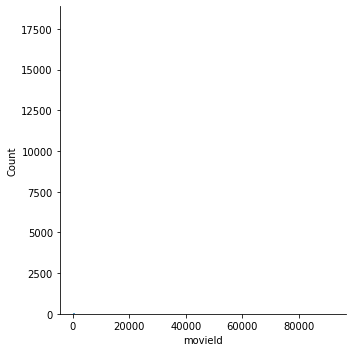

In [ ]:
sns.displot(bmc)

'ratings_small' has 9,066 unique movies while 'ratings' has 45115

In [ ]:
df3 = pd.read_csv('keywords.csv')

In [ ]:
df3.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
len(df3['keywords'][0])

314

In [4]:
df4 = pd.read_csv('credits.csv')

In [6]:
df4.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [8]:
df4['cast']

0        [{'cast_id': 14, 'character': 'Woody (voice)',...
1        [{'cast_id': 1, 'character': 'Alan Parrish', '...
2        [{'cast_id': 2, 'character': 'Max Goldman', 'c...
3        [{'cast_id': 1, 'character': "Savannah 'Vannah...
4        [{'cast_id': 1, 'character': 'George Banks', '...
                               ...                        
45471    [{'cast_id': 0, 'character': '', 'credit_id': ...
45472    [{'cast_id': 1002, 'character': 'Sister Angela...
45473    [{'cast_id': 6, 'character': 'Emily Shaw', 'cr...
45474    [{'cast_id': 2, 'character': '', 'credit_id': ...
45475                                                   []
Name: cast, Length: 45476, dtype: object

In [9]:
df5 = pd.read_csv('movies_metadata.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
df5.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
